In [1]:
# Import libraries
import pandas as pd
import matplotlib as plt
from matplotlib import figure, pyplot
from statistics import median, mean
import numpy as np
import scipy.stats as st
from numpy import nan
import math
import seaborn as sns
import statsmodels.api as sm
from kneed import KneeLocator

In [2]:
# Load in features
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv").iloc[:,1:]
erodedFeatures = pd.read_csv(r"/Users/ilanadeutsch/Desktop/featuresEroded.csv").iloc[:,1:]

In [3]:
# Intialize variable
all_feature_vals = []
results = []

# Iterate through all features
for count, feature in enumerate(features):

    # Add all feature values (eroded and non eroded) to a list
    all_feature_vals.extend(features[str(feature)])
    all_feature_vals.extend(erodedFeatures[str(feature)])

    # Calculate bias
    bias = features[feature] - erodedFeatures[feature]

    # Eliminate NaN values
    all_feature_vals = [x for x in all_feature_vals if not(math.isnan(x))]
    bias = [x for x in bias if not(math.isnan(x))]

    # Find mean feature val
    mean_feature_val = mean(all_feature_vals)

    # Skip features with 0 mean value
    if mean_feature_val == 0:
        continue

    # Calculate norm bias
    norm_bias = abs(mean(bias) / mean_feature_val)

    # Calculate CI
    mean_bias = mean(bias)
    sd = np.std(bias)
    lower_lim = mean_bias - sd*1.96
    upper_lim = mean_bias + sd*1.96

    # Calculate normalized range of agreement
    nRoA = ((upper_lim - lower_lim) / abs(mean_feature_val)) 
    results.append([feature, nRoA, norm_bias])

    # Reset feature value list
    all_feature_vals = []

# Save to dataframe
df = pd.DataFrame(results)

In [4]:
# NOTE: Make sure to reset cells before this before rerunning

# Set value cutoffs
RNoA_cutoff = 100
bias_cutoff = 100

# Intialize list of dropped features
dropped_RNoA_features = []
dropped_bias_features =[]

# Add features below cutoff values to a list
for featNum, feature in enumerate(df[0]):
    if df.iloc[featNum,1] > RNoA_cutoff:
        dropped_RNoA_features.append(feature)  
    elif df.iloc[featNum,2] > bias_cutoff:
        dropped_bias_features.append(feature)

# Remove features below specified cutoff values
df = df[abs(df[1]) < RNoA_cutoff]
df = df[abs(df[2]) < bias_cutoff]

# Calculate overlap
overlap = [feature for feature in dropped_RNoA_features if feature in dropped_bias_features]

# Display dropped features
print(f"Dropped RNoA features: {dropped_RNoA_features}")
print(f"Total = {len(dropped_RNoA_features)}")
print("\n")
print(f"Dropped bias features: {dropped_bias_features}")
print(f"Total = {len(dropped_bias_features)}")
print("\n")
print(f"Overlap: {overlap}")
print(f"Total = {len(overlap)}")

Dropped RNoA features: []
Total = 0


Dropped bias features: []
Total = 0


Overlap: []
Total = 0


Knee location: feature 806
rNoA value: 3.470621692271652


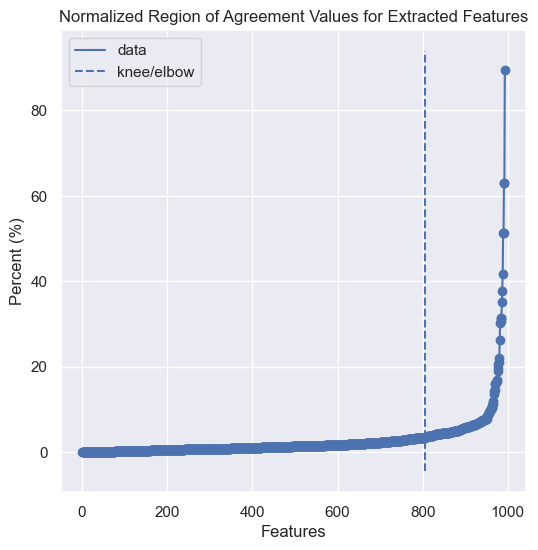

In [6]:
# Sort data frame by nRoA value and export values
sorteddf= df.sort_values(by = 1)
#sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_by_nRoA.xlsx")

# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[0]):
    sorteddf.iloc[entryNum,0] = entryNum

# Locat knee / elbow point
kneedle = KneeLocator(sorteddf.iloc[:,0].tolist(),sorteddf.iloc[:,1].tolist(), S= 200, curve="convex", direction="increasing")
kneedle.plot_knee()

# Print knee location
print(f"Knee location: feature {kneedle.knee}")
print(f"rNoA value: {sorteddf.iloc[kneedle.knee,1]}")

# Plot nRoA values of each feature from smallest to largest
plt.pyplot.scatter(x= sorteddf.iloc[:,0],y = sorteddf.iloc[:,1])
plt.pyplot.title("Normalized Region of Agreement Values for Extracted Features")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("Percent (%)")
plt.pyplot.show()
sns.set_theme()

Knee location: feature 941
Bias value: 0.8055746079311484


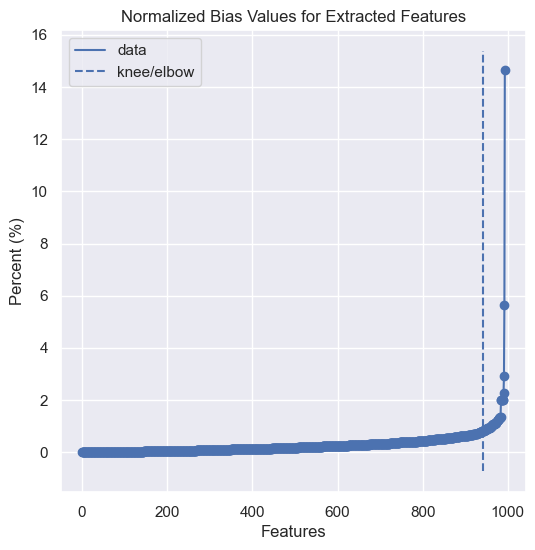

In [7]:
# Sort data frame by bias value and export values
sorteddf=df.sort_values(by = 2)
#sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_by_bias.xlsx")

# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[0]):
    sorteddf.iloc[entryNum,0] = entryNum

# Locate knee / elbow point
kneedle = KneeLocator(sorteddf.iloc[:,0].tolist(),sorteddf.iloc[:,2].tolist(), S= 200, curve="convex", direction="increasing")
kneedle.plot_knee()

# Print knee location
print(f"Knee location: feature {kneedle.knee}")
print(f"Bias value: {sorteddf.iloc[kneedle.knee,2]}")

# Plot bias values of each feature from smalles to largest
sns.set_theme()
plt.pyplot.scatter(x= sorteddf.iloc[:,0],y = sorteddf.iloc[:,2])
plt.pyplot.title("Normalized Bias Values for Extracted Features")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("Percent (%)")
plt.pyplot.show()